Epoch 0: Loss = 14.34330
Epoch 100: Loss = 0.65959
Epoch 200: Loss = 0.97314
Epoch 300: Loss = 0.44937
Epoch 400: Loss = 0.40649
Epoch 500: Loss = 0.86103
Epoch 600: Loss = 1.57560
Epoch 700: Loss = 1.11468
Epoch 800: Loss = 0.46094
Epoch 900: Loss = 0.65320


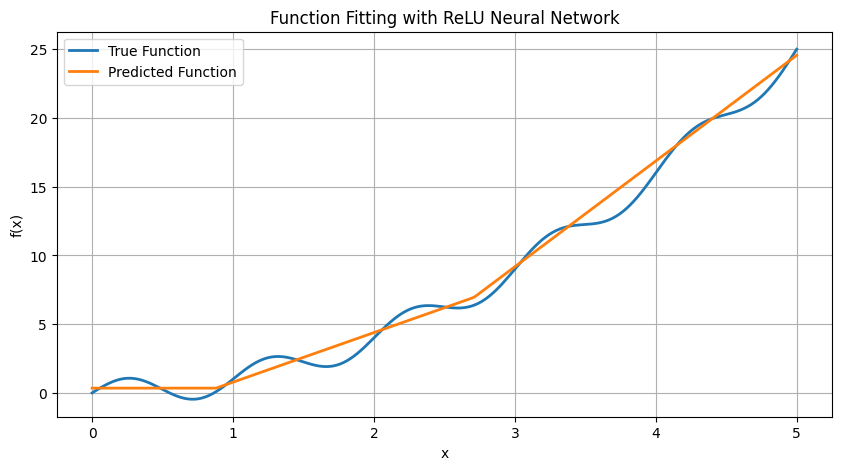

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数（可替换成任意连续函数）
def target_function(x):
    return np.sin(2 * np.pi * x) + x**2

# 生成训练数据
np.random.seed(42)
x_data = np.linspace(0, 5, 200).reshape(-1, 1)
y_data = target_function(x_data)

# 网络结构参数
input_dim = 1
hidden_dim = 128  # 增加隐藏神经元数量
output_dim = 1
learning_rate = 0.01
epochs = 1000
batch_size = 32

# He初始化权重和偏置
W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2. / input_dim)
b1 = np.zeros((1, hidden_dim))

W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2. / hidden_dim)
b2 = np.zeros((1, output_dim))

# 激活函数及其导数
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# 损失函数（均方误差）
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# 训练过程
loss_list = []

for epoch in range(epochs):
    # mini-batch
    indices = np.random.permutation(len(x_data))
    x_data_shuffled = x_data[indices]
    y_data_shuffled = y_data[indices]
    
    for i in range(0, len(x_data), batch_size):
        x_batch = x_data_shuffled[i:i+batch_size]
        y_batch = y_data_shuffled[i:i+batch_size]
        
        # Forward
        z1 = np.dot(x_batch, W1) + b1
        a1 = relu(z1)
        z2 = np.dot(a1, W2) + b2
        y_pred = z2
        
        # Loss
        loss = mse_loss(y_pred, y_batch)
        
        # Backward
        grad_y = 2 * (y_pred - y_batch) / len(x_batch)
        grad_W2 = np.dot(a1.T, grad_y)
        grad_b2 = np.sum(grad_y, axis=0, keepdims=True)

        grad_a1 = np.dot(grad_y, W2.T)
        grad_z1 = grad_a1 * relu_derivative(z1)
        grad_W1 = np.dot(x_batch.T, grad_z1)
        grad_b1 = np.sum(grad_z1, axis=0, keepdims=True)

        # 更新参数
        W2 -= learning_rate * grad_W2
        b2 -= learning_rate * grad_b2
        W1 -= learning_rate * grad_W1
        b1 -= learning_rate * grad_b1
    
    # 记录loss
    if epoch % 100 == 0:
        loss_list.append(loss)
        print(f"Epoch {epoch}: Loss = {loss:.5f}")


# 预测结果
z1 = np.dot(x_data, W1) + b1
a1 = relu(z1)
z2 = np.dot(a1, W2) + b2
y_pred = z2

# 可视化结果
plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data, label='True Function', linewidth=2)
plt.plot(x_data, y_pred, label='Predicted Function', linewidth=2)
plt.legend()
plt.title('Function Fitting with ReLU Neural Network')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()